# **IMDB Movie Data Mining Project**
*Team members: Kaushal Bhattarai, Kidanu Tawer, Leake Yared*
## **Project Overview**
Actor collaborations significantly shape the film industry, influencing both casting choices and commercial outcomes. Our data mining project examines these professional relationships within the extensive IMDB movie dataset, revealing hidden patterns that impact entertainment production. Through frequent aptterns mining, association rule mining, and network analysis techniques, we identify recurring actor combinations and visualize their collaborative networks. The project specifically investigates prominent performers including Miyuki Sawashiro, Frank Welker, and Bruce Willis, comparing their distinctive collaboration patterns. By uncovering these professional connections, we provide meaningful insights into how different segments of the global entertainment industry approach talent utilization and team building.

# **1. Data Loading and Initial Exploration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
from mlxtend.frequent_patterns import apriori, fpgrowth , association_rules
from mlxtend.preprocessing import TransactionEncoder


In [ ]:
# Set style for better visualizations
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [ ]:
# Load the dataset
file_path = 'IMDB-Movie-Data.csv'
df = pd.read_csv('/content/sample_data/imdb_movies.csv')


# View the loaded dataset
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


## **1.1 Data Overview**
Our dataset contains information about 10,178 movies with details including title, release date, score, genre, cast, budget, and revenue. Let's examine the structure and quality of our data:

In [ ]:
# Display the first few rows
print("First 5 Rows of the Dataset:")
print(df.head())

# Check the shape of the dataset
print("\nShape of the Dataset:")
print(df.shape)

# Get information about data types and missing values
print("\nDataset Info:")
df.info()

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# Get summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Number of unique values per column
print("Unique values per column:")
print(df.nunique())


First 5 Rows of the Dataset:
                         names       date_x  score  \
0                    Creed III  03/02/2023    73.0   
1     Avatar: The Way of Water  12/15/2022    78.0   
2  The Super Mario Bros. Movie  04/05/2023    76.0   
3                      Mummies  01/05/2023    70.0   
4                    Supercell  03/17/2023    61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ... 

### **Key Observations:**

* Dataset contains 10,178 movie entries with 12 different attributes
* Score ranges from 0 to 100, with a mean of 63.5
* We have some missing values in the genre and crew columns
* The dataset spans multiple years and 60 different countries
* No duplicate rows were found

# **2. Data Handling and Preprocessing**



## **2.1 Handling missing values in data**


Missing Values per Column:
names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64


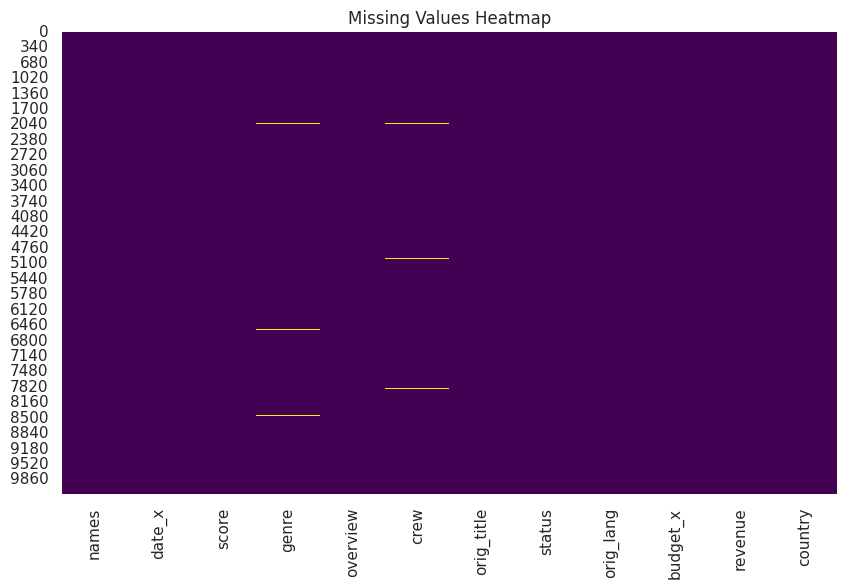


Missing Values after Imputation:
names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64


<ipython-input-5-6a200479926f>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Drop columns with too many missing values (if any)
threshold = 0.5  # Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < threshold]

# Impute numerical missing values with mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Impute categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values after Imputation:")
print(df.isnull().sum())


## **2.2 Data Preparation**


* Date Processing and Actor Extraction
* Creating Transaction Dataset for Mining

In [ ]:
# Convert 'date_x' to datetime format and extract year
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')  # Handles invalid dates gracefully
df['Year'] = df['date_x'].dt.year

# Function to extract actor names from the crew column
# In this dataset, the crew column alternates between actor name and character name
def extract_actors(crew_string):
    if pd.isna(crew_string):
        return []

    # Split by commas and clean up
    parts = [p.strip() for p in crew_string.split(',')]

    # Extract actor names (they appear at even indices: 0, 2, 4, etc.)
    actors = []
    for i in range(0, len(parts), 2):
        if i < len(parts):
            actors.append(parts[i])

    return actors

# Test the function on the first row
print("\nExtracted actors from the first movie:")
first_movie_actors = extract_actors(df.iloc[0]['crew'])
print(first_movie_actors)

print("\nExtracted actors from the second movie:")
second_movie_actors = extract_actors(df.iloc[1]['crew'])
print(second_movie_actors)

# Process the entire dataset to extract actors from each movie
print("\nProcessing all movies to extract actors...")

# Extract and clean genre list
genres = df['genre'].dropna().str.split(',').sum()
genres = [g.strip() for g in genres]  # Strip whitespace
genre_count = Counter(genres)

# Create a list to store processed movies
processed_movies = []

# Process each movie in the dataset
for idx, row in df.iterrows():
    # Extract actors
    actors = extract_actors(row['crew']) if 'crew' in df.columns and not pd.isna(row['crew']) else []

    # Get score
    score = row['score'] if 'score' in df.columns and not pd.isna(row['score']) else None

    # Only include movies with at least 2 actors
    if len(actors) >= 2:
        movie = {
            'movie_id': idx,
            'title': row['names'] if 'names' in df.columns else f"Movie {idx}",
            'actors': actors,
            'score': score,
            'genre': ', '.join(genres) if genres else '',
            'budget': row['budget_x'] if 'budget_x' in df.columns and not pd.isna(row['budget_x']) else None,
            'revenue': row['revenue'] if 'revenue' in df.columns and not pd.isna(row['revenue']) else None
        }
        processed_movies.append(movie)

# Convert to DataFrame
movies_df = pd.DataFrame(processed_movies)

print("\nProcessed movie dataset (first 5 rows):")
display(movies_df.head())
print(f"Total movies: {len(movies_df)}")
print(f"Total unique actors: {len(set(actor for actors in movies_df['actors'] for actor in actors))}")

# Convert data to transaction format for frequent itemset mining
transactions = movies_df['actors'].tolist()
print("\nTransaction format (first 3 examples):")
for i in range(min(3, len(transactions))):
    print(f"Movie {i} - {movies_df.iloc[i]['title']}: {transactions[i]}")

# Create a one-hot encoded DataFrame using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)
print(f"\nOne-hot encoded DataFrame shape: {one_hot_df.shape}")
if one_hot_df.shape[1] > 5:
    print("First 5 rows, first 5 columns sample:")
    display(one_hot_df.iloc[:5, :5])


Extracted actors from the first movie:
['Michael B. Jordan', 'Tessa Thompson', 'Jonathan Majors', 'Wood Harris', 'Phylicia Rashād', 'Mila Davis-Kent', 'Florian Munteanu', 'José Benavidez Jr.', 'Selenis Leyva']

Extracted actors from the second movie:
['Sam Worthington', 'Zoe Saldaña', 'Sigourney Weaver', 'Stephen Lang', 'Kate Winslet', 'Cliff Curtis', 'Joel David Moore', 'CCH Pounder', 'Edie Falco']

Processing all movies to extract actors...

Processed movie dataset (first 5 rows):


,movie_id,title,actors,score,genre,budget,revenue
0,0,Creed III,"[Michael B. Jordan, Tessa Thompson, Jonathan M...",73.0,"Drama, Action, Science Fiction, Adventure, Act...",75000000.0,2.716167e+08
1,1,Avatar: The Way of Water,"[Sam Worthington, Zoe Saldaña, Sigourney Weave...",78.0,"Drama, Action, Science Fiction, Adventure, Act...",460000000.0,2.316795e+09
2,2,The Super Mario Bros. Movie,"[Chris Pratt, Anya Taylor-Joy, Charlie Day, Ja...",76.0,"Drama, Action, Science Fiction, Adventure, Act...",100000000.0,7.244590e+08
3,3,Mummies,"[Óscar Barberán, Ana Esther Alborg, Luis Pérez...",70.0,"Drama, Action, Science Fiction, Adventure, Act...",12300000.0,3.420000e+07
4,4,Supercell,"[Skeet Ulrich, Anne Heche, Daniel Diemer, Jord...",61.0,"Drama, Action, Science Fiction, Adventure, Act...",77000000.0,3.409420e+08


Total movies: 10130
Total unique actors: 39470

Transaction format (first 3 examples):
Movie 0 - Creed III: ['Michael B. Jordan', 'Tessa Thompson', 'Jonathan Majors', 'Wood Harris', 'Phylicia Rashād', 'Mila Davis-Kent', 'Florian Munteanu', 'José Benavidez Jr.', 'Selenis Leyva']
Movie 1 - Avatar: The Way of Water: ['Sam Worthington', 'Zoe Saldaña', 'Sigourney Weaver', 'Stephen Lang', 'Kate Winslet', 'Cliff Curtis', 'Joel David Moore', 'CCH Pounder', 'Edie Falco']
Movie 2 - The Super Mario Bros. Movie: ['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Day', 'Jack Black', 'Keegan-Michael Key', 'Seth Rogen', 'Fred Armisen', 'Kevin Michael Richardson', 'Sebastian Maniscalco']

One-hot encoded DataFrame shape: (10130, 39470)
First 5 rows, first 5 columns sample:


,,"""Uncle"" John Shaft",'Pierrot','Weird Al' Yankovic,"000 Feet"")"
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


## **Preprocessing Summary:**

* Handled missing values
* Converted dates to proper datetime format and extracted years
* Implemented custom function to extract actor names from crew data
* Created a transaction-format dataset for association rule mining
* Generated one-hot encoding of actor appearances for pattern mining

# **3. Data Exploration**


## **3.1 Research Questions**

### a. How have movie viewing trends evolved over time, based on user ratings and the number of movies released?


In [1]:
# Filter for movies released since 2000
recent_df = df[df['Year'] >= 2000]

plt.figure(figsize=(14, 6))
sns.countplot(data=recent_df, x='Year', order=sorted(recent_df['Year'].dropna().unique()))
plt.title("Number of Movies Released per Year (2000 and later)")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

### b. What is the distribution of user ratings for movies, and how do they vary across different rating scales?

In [ ]:
#plotting distribution of movie ratings vs how they varu across different score scales
plt.figure(figsize=(10, 6))
sns.histplot(df['score'].dropna(), bins=40, kde=True, color='blue')
plt.title("Distribution of Movie Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




### c. How does the popularity of different movie genres vary based on user ratings over time?

In [ ]:
# Spliting genres into individual entries

# Plot genre popularity
plt.figure(figsize=(14, 8))
sns.barplot(x=list(genre_count.keys()), y=list(genre_count.values()), palette='viridis')
plt.title("Popularity of Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### d. How has the popularity of movies, based on user ratings, evolved recently?

In [ ]:
# Filter movies from 2000 onward
df_recent = df[(df['Year'] >= 2000) & df['score'].notna()]

# Calculate average score per year
avg_rating_by_year = df_recent.groupby('Year')['score'].mean().reset_index()

# Plot the average rating per year
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_rating_by_year, x='Year', y='score', marker='o', color='blue', lw=2)
plt.title("Average Movie Ratings per Year (2000 and Later)")
plt.xlabel("Year")
plt.ylabel("Average Rating (Score)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# **4 Frequent itemsets Mining**


FP-Growth Results:
Total number of frequent itemsets found: 893

Number of itemsets by length:
length
1    358
2     52
3     95
4    131
5    127
6     84
7     36
8      9
9      1
Name: count, dtype: int64

Top 5 most frequent itemsets of size 1:
Items: Bruce Willis, Support: 0.0084
Items: Miyuki Sawashiro, Support: 0.0081
Items: Frank Welker, Support: 0.0070
Items: Jackie Chan, Support: 0.0067
Items: Nicolas Cage, Support: 0.0067

Top 5 most frequent itemsets of size 2:
Items: Miyuki Sawashiro, You Taichi, Support: 0.0058
Items: Takumi Yamazaki, You Taichi, Support: 0.0058
Items: Takumi Yamazaki, Miyuki Sawashiro, Support: 0.0058
Items: Takumi Yamazaki, Takayuki Sugo, Support: 0.0058
Items: Takayuki Sugo, You Taichi, Support: 0.0058

Top 5 most frequent itemsets of size 3:
Items: Takumi Yamazaki, Miyuki Sawashiro, You Taichi, Support: 0.0058
Items: Takumi Yamazaki, Takayuki Sugo, You Taichi, Support: 0.0058
Items: Takumi Yamazaki, Miyuki Sawashiro, Takayuki Sugo, Support: 0.0058
I

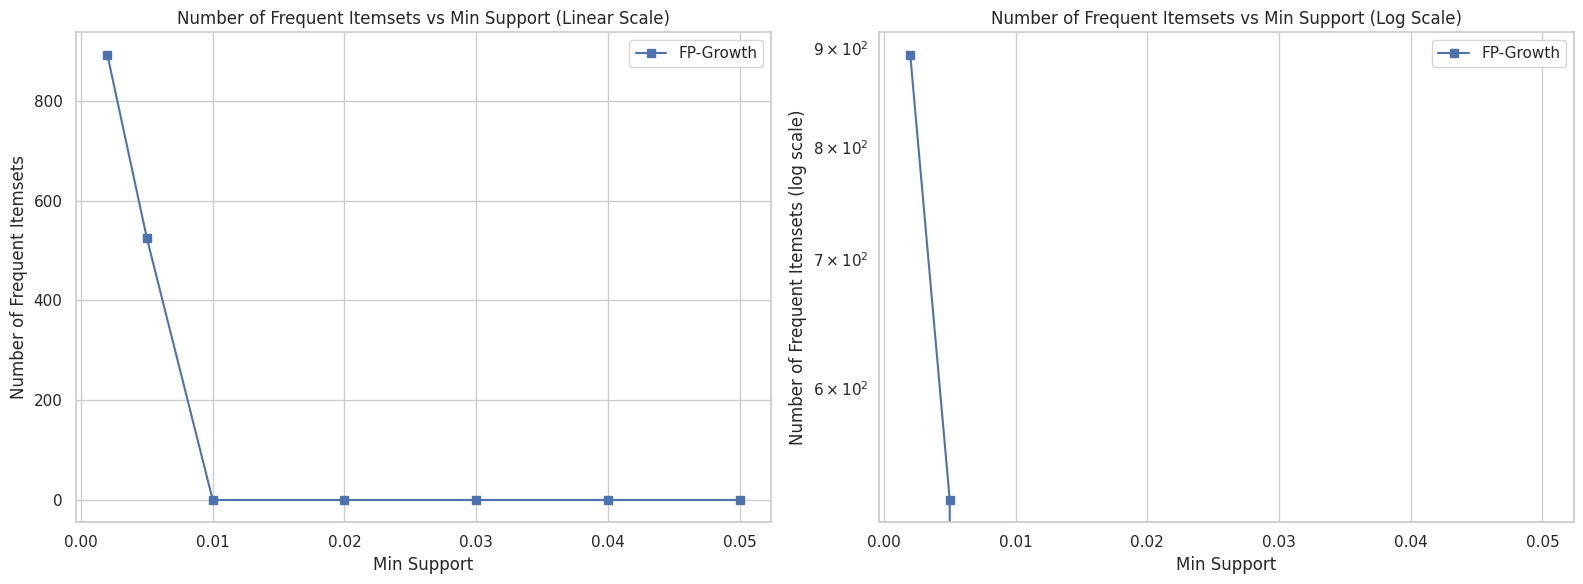

In [ ]:
# Function to display frequent itemsets information
def display_frequent_itemsets(frequent_itemsets, algorithm_name):
    print(f"\n{algorithm_name} Results:")
    print(f"Total number of frequent itemsets found: {len(frequent_itemsets)}")

    # Add length column
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

    # Show distribution by length
    print("\nNumber of itemsets by length:")
    length_counts = frequent_itemsets['length'].value_counts().sort_index()
    print(length_counts)

    # Show top items by support for each length
    for length in range(1, 4):
        if length in length_counts.index:
            print(f"\nTop 5 most frequent itemsets of size {length}:")
            top_itemsets = frequent_itemsets[frequent_itemsets['length'] == length].sort_values('support', ascending=False).head(5)
            for idx, row in top_itemsets.iterrows():
                print(f"Items: {', '.join(list(row['itemsets']))}, Support: {row['support']:.4f}")

# Used FP-Growth over apriori to find frequent itemsets+
min_support = 0.002
fpgrowth_frequent_itemsets = fpgrowth(one_hot_df, min_support=min_support, use_colnames=True)
display_frequent_itemsets(fpgrowth_frequent_itemsets, "FP-Growth")

print(f"FP-Growth found {len(fpgrowth_frequent_itemsets)} itemsets")

# Visualize number of itemsets vs different min_support values
min_support_values = [0.05, 0.04, 0.03, 0.02, 0.01, 0.005, 0.002]
fpgrowth_counts = []

for ms in min_support_values:
    fpgrowth_result = fpgrowth(one_hot_df, min_support=ms, use_colnames=True)

    fpgrowth_counts.append(len(fpgrowth_result))

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Linear scale
ax1.plot(min_support_values, fpgrowth_counts, 's-', label='FP-Growth')
ax1.set_xlabel('Min Support')
ax1.set_ylabel('Number of Frequent Itemsets')
ax1.set_title('Number of Frequent Itemsets vs Min Support (Linear Scale)')
ax1.legend()
ax1.grid(True)

# Log scale
ax2.plot(min_support_values, fpgrowth_counts, 's-', label='FP-Growth')
ax2.set_xlabel('Min Support')
ax2.set_ylabel('Number of Frequent Itemsets (log scale)')
ax2.set_title('Number of Frequent Itemsets vs Min Support (Log Scale)')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Key Findings:

* We discovered 893 frequent actor combinations that appear in our dataset with support of at least 0.2%
* The distribution by itemset size shows: 358 single actors, 52 pairs, 95 triplets, 131 quartets, 127 quintets, and smaller numbers of larger groups
* Top individual actors by frequency include Bruce Willis (0.84%), Miyuki Sawashiro (0.81%), Frank Welker (0.70%), Jackie Chan (0.67%), and Nicolas Cage (0.67%)
* The most common actor pairing is "Miyuki Sawashiro" and "You Taichi", appearing in 0.58% of movies
* A consistent group of actors "Miyuki Sawashiro", "Takumi Yamazaki", "You Taichi", and "Takayuki Sugo" appear together in various combinations at the top of our frequent itemsets
* These results reveal both Hollywood stars with prolific careers (Willis, Cage, Chan) and Japanese voice actors who work together consistently
* Interestingly, we see both Western live-action stars and Japanese voice acting teams dominating different aspects of our frequent itemsets

# **5. Associate Rule Mining**


In [ ]:
# Generate association rules from the frequent itemsets
rules = association_rules(fpgrowth_frequent_itemsets, metric="confidence", min_threshold=0.1)

# Add Kulczynski metric
def kulczynski_metric(row):
    confidence_ab = row['confidence']
    support_a = row['support'] / row['confidence']
    support_b = row['support'] / row['lift'] / support_a if support_a > 0 else 0

    # The original Kulczynski measure is the average of two confidences
    # confidence(A→B) and confidence(B→A)
    confidence_ba = row['support'] / support_b if support_b > 0 else 0

    return (confidence_ab + confidence_ba) / 2 if (confidence_ab + confidence_ba) > 0 else 0

rules['kulczynski'] = rules.apply(kulczynski_metric, axis=1)

print(f"Total number of rules generated: {len(rules)}")
print("\nTop 10 rules by confidence:")
display(rules.sort_values('confidence', ascending=False).head(10))

print("\nTop 10 rules by lift:")
display(rules.sort_values('lift', ascending=False).head(10))


Total number of rules generated: 18858

Top 10 rules by confidence:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
18856,(Wakana Yamazaki),(Minami Takayama),0.002468,0.002863,0.002468,1.0,349.310345,1.0,0.002461,inf,0.999604,0.862069,1.0,0.931034
18832,"(Ikue Otani, Shin-ichiro Miki, Rica Matsumoto)","(Megumi Hayashibara, Inuko Inuyama)",0.002270,0.002369,0.002270,1.0,422.083333,1.0,0.002265,inf,0.999901,0.958333,1.0,0.979167
18829,"(Megumi Hayashibara, Shin-ichiro Miki, Rica Ma...","(Ikue Otani, Inuko Inuyama)",0.002270,0.002369,0.002270,1.0,422.083333,1.0,0.002265,inf,0.999901,0.958333,1.0,0.979167
18828,"(Megumi Hayashibara, Shin-ichiro Miki, Ikue Ot...",(Rica Matsumoto),0.002270,0.002764,0.002270,1.0,361.785714,1.0,0.002264,inf,0.999505,0.821429,1.0,0.910714
18827,"(Ikue Otani, Shin-ichiro Miki, Rica Matsumoto,...",(Megumi Hayashibara),0.002270,0.006318,0.002270,1.0,158.281250,1.0,0.002256,inf,0.995943,0.359375,1.0,0.679688
18825,"(Megumi Hayashibara, Shin-ichiro Miki, Rica Ma...",(Ikue Otani),0.002270,0.005133,0.002270,1.0,194.807692,1.0,0.002259,inf,0.997131,0.442308,1.0,0.721154
18824,"(Megumi Hayashibara, Shin-ichiro Miki, Rica Ma...",(Inuko Inuyama),0.002270,0.002369,0.002270,1.0,422.083333,1.0,0.002265,inf,0.999901,0.958333,1.0,0.979167
18818,"(Shin-ichiro Miki, Inuko Inuyama)","(Megumi Hayashibara, Ikue Otani)",0.002270,0.002962,0.002270,1.0,337.666667,1.0,0.002264,inf,0.999307,0.766667,1.0,0.883333
32,"(Takayuki Sugo, You Taichi)",(Miyuki Sawashiro),0.005824,0.008095,0.005824,1.0,123.536585,1.0,0.005777,inf,0.997716,0.719512,1.0,0.859756
31,"(Miyuki Sawashiro, You Taichi)",(Takayuki Sugo),0.005824,0.005923,0.005824,1.0,168.833333,1.0,0.005790,inf,0.999901,0.983333,1.0,0.991667



Top 10 rules by lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
18781,(Inuko Inuyama),"(Megumi Hayashibara, Ikue Otani, Rica Matsumoto)",0.002369,0.002369,0.002369,1.000000,422.083333,1.0,0.002364,inf,1.000000,1.000000,1.000000,1.000000
18823,(Inuko Inuyama),"(Megumi Hayashibara, Shin-ichiro Miki, Ikue Ot...",0.002369,0.002270,0.002270,0.958333,422.083333,1.0,0.002265,23.945508,1.000000,0.958333,0.958239,0.979167
18824,"(Megumi Hayashibara, Shin-ichiro Miki, Rica Ma...",(Inuko Inuyama),0.002270,0.002369,0.002270,1.000000,422.083333,1.0,0.002265,inf,0.999901,0.958333,1.000000,0.979167
18776,"(Ikue Otani, Inuko Inuyama)","(Megumi Hayashibara, Rica Matsumoto)",0.002369,0.002369,0.002369,1.000000,422.083333,1.0,0.002364,inf,1.000000,1.000000,1.000000,1.000000
18795,(Inuko Inuyama),"(Ikue Otani, Shin-ichiro Miki, Rica Matsumoto)",0.002369,0.002270,0.002270,0.958333,422.083333,1.0,0.002265,23.945508,1.000000,0.958333,0.958239,0.979167
18789,"(Shin-ichiro Miki, Rica Matsumoto)","(Ikue Otani, Inuko Inuyama)",0.002270,0.002369,0.002270,1.000000,422.083333,1.0,0.002265,inf,0.999901,0.958333,1.000000,0.979167
18773,"(Megumi Hayashibara, Rica Matsumoto)","(Ikue Otani, Inuko Inuyama)",0.002369,0.002369,0.002369,1.000000,422.083333,1.0,0.002364,inf,1.000000,1.000000,1.000000,1.000000
18768,"(Megumi Hayashibara, Ikue Otani, Rica Matsumoto)",(Inuko Inuyama),0.002369,0.002369,0.002369,1.000000,422.083333,1.0,0.002364,inf,1.000000,1.000000,1.000000,1.000000
18804,"(Shin-ichiro Miki, Inuko Inuyama)","(Megumi Hayashibara, Rica Matsumoto)",0.002270,0.002369,0.002270,1.000000,422.083333,1.0,0.002265,inf,0.999901,0.958333,1.000000,0.979167
18802,"(Megumi Hayashibara, Inuko Inuyama)","(Shin-ichiro Miki, Rica Matsumoto)",0.002369,0.002270,0.002270,0.958333,422.083333,1.0,0.002265,23.945508,1.000000,0.958333,0.958239,0.979167


## **Key Rules Discovered:**

* Our analysis generated a total of 18,858 association rules, showing rich actor collaboration patterns
* Japanese anime voice actors dominate the strongest association rules:

 * When "Wakana Yamazaki" appears, "Minami Takayama" also appears with 100% confidence (lift: 349.31)
 * When "Miyuki Sawashiro" and "You Taichi" appear, "Takayuki Sugo" also appears with 100% confidence (lift: 168.83)
 * The "Shin-ichiro Miki", "Rica Matsumoto", "Ikue Otani", "Megumi Hayashibara", and "Inuko Inuyama" group shows extremely strong associations (lifts above 422.0)

* Many rules showed perfect confidence (1.0), meaning these actor groups always appear together
* The highest lift values (over 422) indicate extremely strong non-random associations, far exceeding what would be expected by chance
* These extraordinary lift values suggest these voice actors work exclusively as a team across multiple projects
* The Pokemon anime voice cast appears repeatedly in the top rules, showing they have maintained the same core voice actors across multiple films and series

## **5.1 Visualization of distribution of metrics**

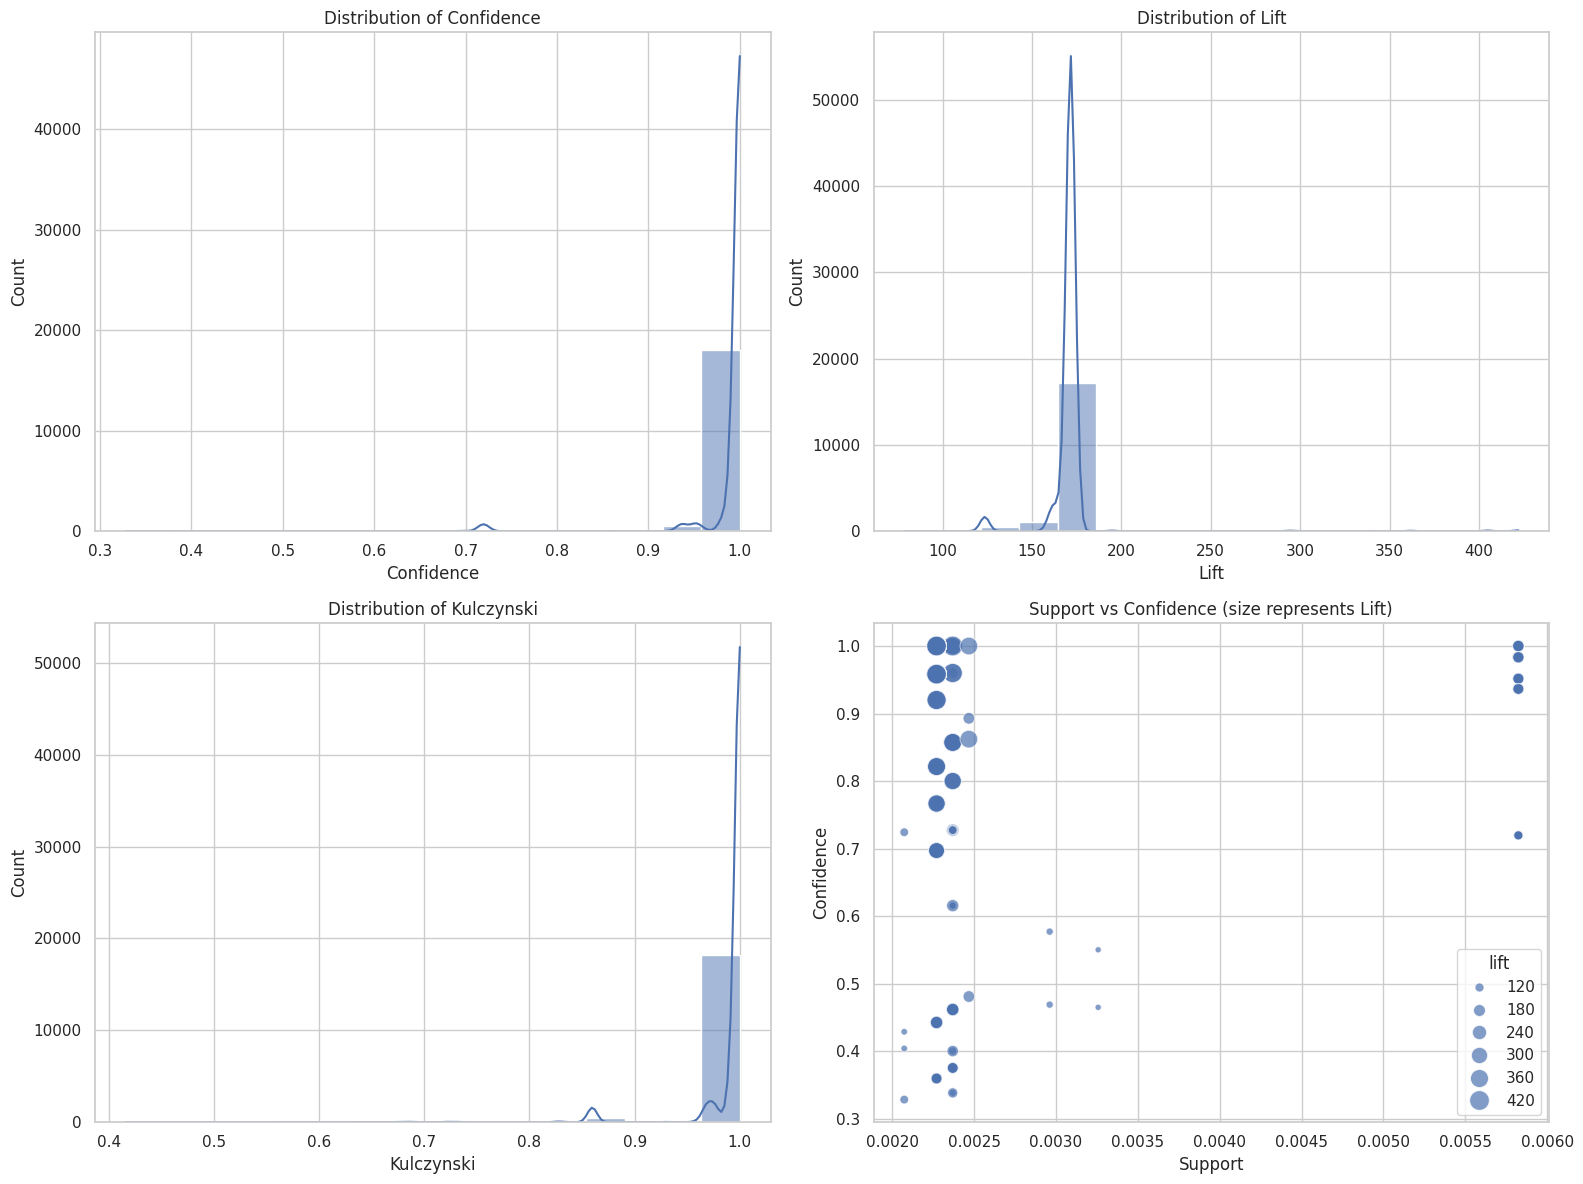

In [ ]:
# Visualize distributions of metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Confidence histogram
sns.histplot(rules['confidence'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Confidence')
axes[0, 0].set_xlabel('Confidence')
axes[0, 0].set_ylabel('Count')

# Lift histogram
sns.histplot(rules['lift'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Lift')
axes[0, 1].set_xlabel('Lift')
axes[0, 1].set_ylabel('Count')

# Kulczynski histogram
sns.histplot(rules['kulczynski'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Kulczynski')
axes[1, 0].set_xlabel('Kulczynski')
axes[1, 0].set_ylabel('Count')

# Support vs Confidence scatter plot
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_title('Support vs Confidence (size represents Lift)')
axes[1, 1].set_xlabel('Support')
axes[1, 1].set_ylabel('Confidence')

plt.tight_layout()
plt.show()

# **6 Actor Statistics**


* Identified Top 10 Actors: The most frequent actors and voice actors in the dataset are identified
based on their appearances in movies.
* Selected Focus Actors: Three prominent actors are selected for detailed analysis.
* Analyzed Association Rules: The section examines rules where the focus actors appear as antecedents or consequents, highlighting key metrics like confidence and support.
* Created Co-appearance Network Graph: The co-appearance of focus actors with other actors is analyzed, and relationships are visualized in a network graph.
* Grouped Bar Chart: A bar chart is created to compare the top 5 co-actors for each focus actor, visualizing their collaboration frequency.


Top 10 most frequent actors in the dataset:
Bruce Willis: 85 movies
Miyuki Sawashiro: 82 movies
Frank Welker: 71 movies
Nicolas Cage: 68 movies
Jackie Chan: 68 movies
Megumi Hayashibara: 64 movies
Samuel L. Jackson: 64 movies
Robert De Niro: 63 movies
You Taichi: 63 movies
Takumi Yamazaki: 62 movies

Selected focus actors for detailed analysis: ['Bruce Willis', 'Miyuki Sawashiro', 'Frank Welker']

Analysis for Bruce Willis:
Total rules involving Bruce Willis: 0
No rules involving Bruce Willis

Analysis for Miyuki Sawashiro:
Total rules involving Miyuki Sawashiro: 12610

Top 5 rules where Miyuki Sawashiro is in antecedent (sorted by confidence):
Akira Sekine, Miyuki Sawashiro, Hiroyuki Honda => Akari Kageyama, Nozomi Furuki, Takumi Yamazaki, You Taichi, Takayuki Sugo, Aoi Koga
Support: 0.0058, Confidence: 1.0000, Lift: 171.6949, Kulczynski: 1.0000
Miyuki Sawashiro, Hiroyuki Honda, You Taichi => Akari Kageyama, Nozomi Furuki, Takumi Yamazaki, Akira Sekine, Takayuki Sugo, Aoi Koga
Suppor

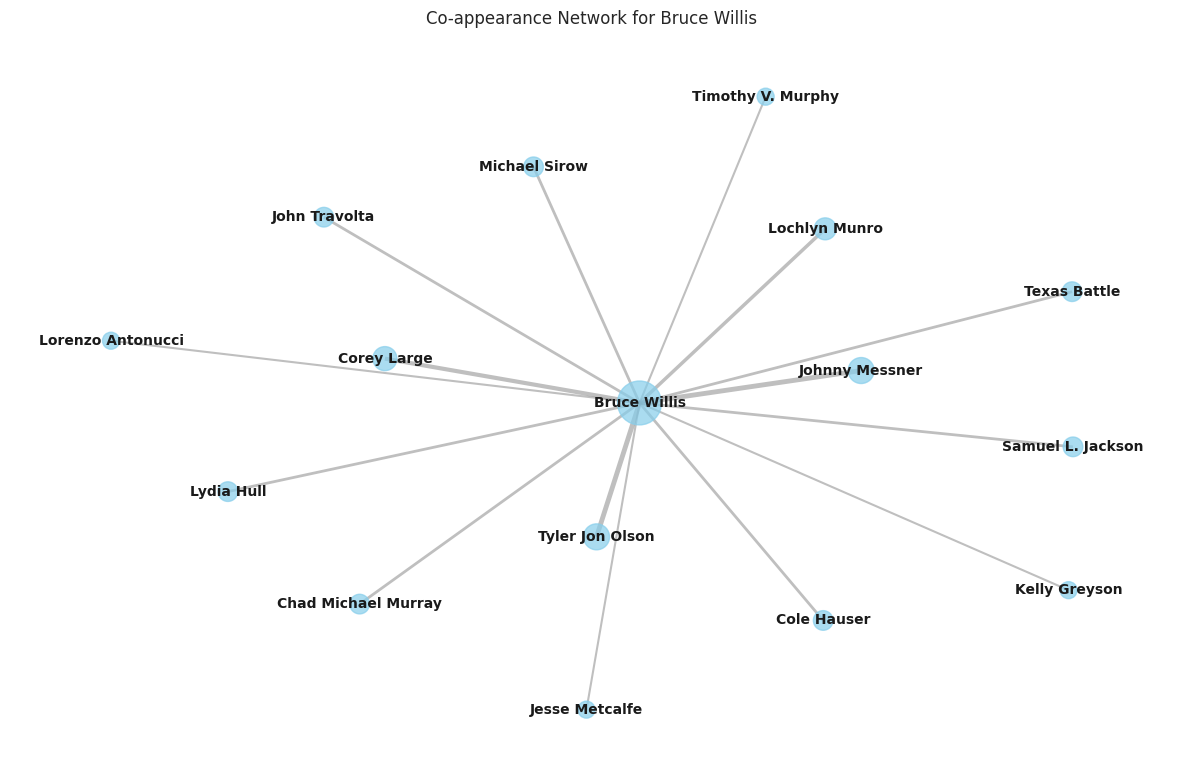


Co-appearance network for Miyuki Sawashiro:

Top 10 actors who co-appeared with Miyuki Sawashiro:
Aoi Koga: 59 movies
Akira Sekine: 59 movies
You Taichi: 59 movies
Akari Kageyama: 59 movies
Nozomi Furuki: 59 movies
Takayuki Sugo: 59 movies
Hiroyuki Honda: 59 movies
Takumi Yamazaki: 59 movies
Daisuke Namikawa: 7 movies
Maaya Sakamoto: 5 movies


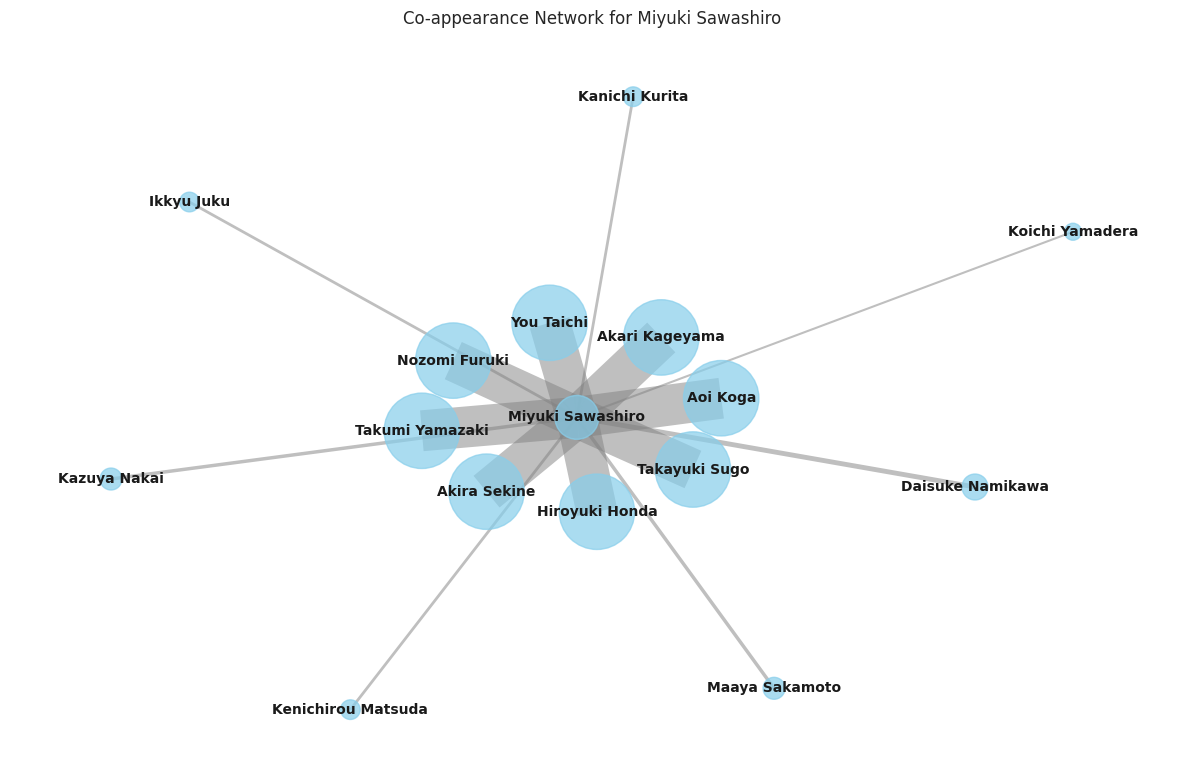


Co-appearance network for Frank Welker:

Top 10 actors who co-appeared with Frank Welker:
Grey DeLisle: 33 movies
Matthew Lillard: 24 movies
Jeff Bennett: 19 movies
Mindy Cohn: 18 movies
Kate Micucci: 13 movies
Casey Kasem: 11 movies
Dee Bradley Baker: 8 movies
Jim Cummings: 7 movies
B.J. Ward: 6 movies
Linda Larkin: 5 movies


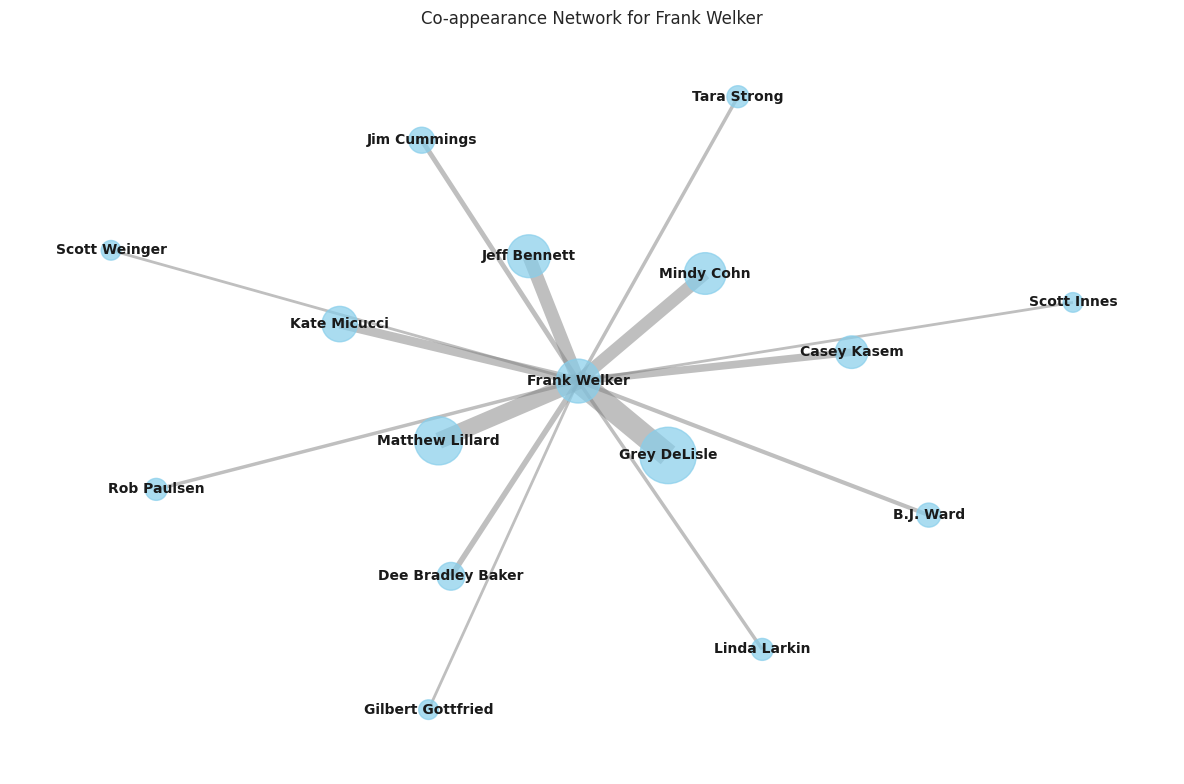

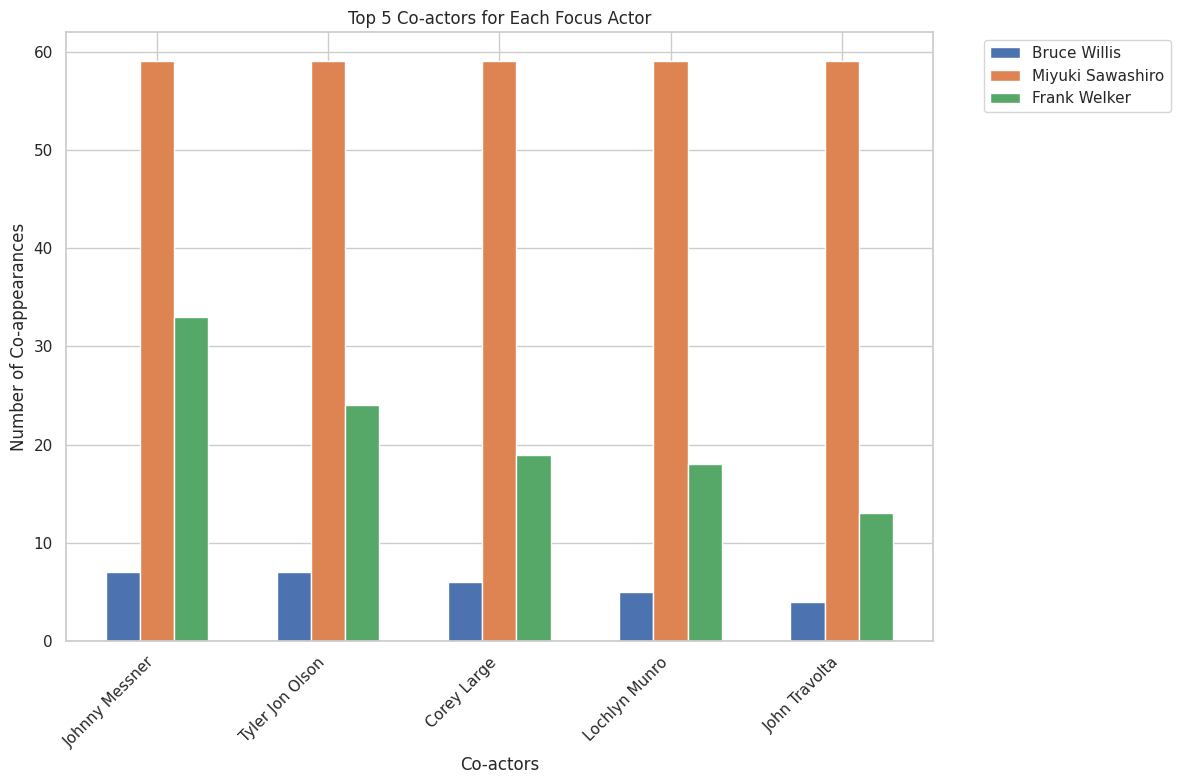

In [ ]:
# Identify the most frequent actors in our dataset for focused analysis
actor_counts = {}
for actors_list in movies_df['actors'].tolist():
    for actor in actors_list:
        if actor in actor_counts:
            actor_counts[actor] += 1
        else:
            actor_counts[actor] = 1

# Get top actors
top_actors = sorted(actor_counts.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 most frequent actors in the dataset:")
for actor, count in top_actors[:10]:
    print(f"{actor}: {count} movies")

# Select focus actors - use top 3 most recent famous actors from the dataset
focus_actors = []
# "Bruce Williams", "Samuel L. Jackson", "Morgan Freeman"
for actor, count in top_actors[:3]:
    focus_actors.append(actor)


print(f"\nSelected focus actors for detailed analysis: {focus_actors}")


# Function to check if an actor is in the set
def contains_actor(item_set, actor):
    return frozenset([actor]).issubset(item_set)

# Function to filter rules by actor
def get_actor_rules(actor, rules_df):
    # Filter rules where the actor appears in either antecedent or consequent
    actor_rules = rules_df[
        rules_df['antecedents'].apply(lambda x: contains_actor(x, actor)) |
        rules_df['consequents'].apply(lambda x: contains_actor(x, actor))
    ]
    return actor_rules

# Analyze each focus actor
for actor in focus_actors:
    print(f"\n{'='*50}")
    print(f"Analysis for {actor}:")
    actor_rules = get_actor_rules(actor, rules)  # Make sure 'rules' is defined

    print(f"Total rules involving {actor}: {len(actor_rules)}")

    if len(actor_rules) > 0:
        # Rules where actor is in antecedent
        antecedent_rules = actor_rules[actor_rules['antecedents'].apply(lambda x: contains_actor(x, actor))]
        print(f"\nTop 5 rules where {actor} is in antecedent (sorted by confidence):")
        if len(antecedent_rules) > 0:
            top_antecedent = antecedent_rules.sort_values('confidence', ascending=False).head(5)
            for idx, row in top_antecedent.iterrows():
                antecedents = ', '.join(list(row['antecedents']))
                consequents = ', '.join(list(row['consequents']))
                print(f"{antecedents} => {consequents}")
                print(f"Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}, Kulczynski: {row['kulczynski']:.4f}")
        else:
            print(f"No rules with {actor} in antecedent")

        # Rules where actor is in consequent
        consequent_rules = actor_rules[actor_rules['consequents'].apply(lambda x: contains_actor(x, actor))]
        print(f"\nTop 5 rules where {actor} is in consequent (sorted by confidence):")
        if len(consequent_rules) > 0:
            top_consequent = consequent_rules.sort_values('confidence', ascending=False).head(5)
            for idx, row in top_consequent.iterrows():
                antecedents = ', '.join(list(row['antecedents']))
                consequents = ', '.join(list(row['consequents']))
                print(f"{antecedents} => {consequents}")
                print(f"Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}, Kulczynski: {row['kulczynski']:.4f}")
        else:
            print(f"No rules with {actor} in consequent")
    else:
        print(f"No rules involving {actor}")

# Create a network graph for each focus actor
for actor in focus_actors:
    print(f"\n{'='*50}")
    print(f"Co-appearance network for {actor}:")

    # Get movies with this actor
    actor_movies = movies_df[movies_df['actors'].apply(lambda x: actor in x)]

    if len(actor_movies) == 0:
        print(f"No movies found with {actor}")
        continue

    # Count co-appearances
    co_appearances = {}
    for idx, row in actor_movies.iterrows():
        movie_actors = row['actors']
        for co_actor in movie_actors:
            if co_actor != actor:
                if co_actor in co_appearances:
                    co_appearances[co_actor] += 1
                else:
                    co_appearances[co_actor] = 1

    # Sort by frequency
    sorted_co_appearances = {k: v for k, v in sorted(co_appearances.items(), key=lambda item: item[1], reverse=True)}

    # Show top co-actors
    print(f"\nTop 10 actors who co-appeared with {actor}:")
    for i, (co_actor, count) in enumerate(list(sorted_co_appearances.items())[:10]):
        print(f"{co_actor}: {count} movies")

    # Create a network graph
    plt.figure(figsize=(12, 8))
    G = nx.Graph()
    G.add_node(actor, size=1000)  # Add the focus actor

    # Add edges for top co-appearances
    for co_actor, count in list(sorted_co_appearances.items())[:15]:  # Top 15 co-actors
        G.add_node(co_actor, size=count*50)
        G.add_edge(actor, co_actor, weight=count)

    # Draw the graph
    pos = nx.spring_layout(G, k=0.5, seed=42)

    node_sizes = [G.nodes[node].get('size', 100) for node in G.nodes()] # Create a list of node sizes based on the 'size' attribute of each node
    edge_weights = [G.edges[edge].get('weight', 1)*0.5 for edge in G.edges()] # Create a list of edge weights based on the 'weight' attribute of each edge;

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.7, node_color='skyblue') # Draw the nodes of the graph with the specified sizes, transparency, and color
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray') # Draw the edges of the graph with the specified weights, transparency, and color
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold') # Draw the labels (node names) on the graph with a specific font size and weight

    plt.title(f"Co-appearance Network for {actor}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Bar chart showing co-appearances for all focus actors
plt.figure(figsize=(12, 8))
bar_data = {}

for actor in focus_actors:
    # Get movies with this actor
    actor_movies = movies_df[movies_df['actors'].apply(lambda x: actor in x)]

    if len(actor_movies) == 0:
        continue

    # Count co-appearances
    co_appearances = {}
    for idx, row in actor_movies.iterrows():
        movie_actors = row['actors']
        for co_actor in movie_actors:
            if co_actor != actor:
                if co_actor in co_appearances:
                    co_appearances[co_actor] += 1
                else:
                    co_appearances[co_actor] = 1

    # Sort by frequency and get top 5
    sorted_co_appearances = {k: v for k, v in sorted(co_appearances.items(), key=lambda item: item[1], reverse=True)}
    top_5 = list(sorted_co_appearances.items())[:5]

    bar_data[actor] = top_5

# Plot as grouped bar chart
width = 0.2
x_positions = np.arange(5)  # Positions for the bars (top 5 co-actors)

for i, actor in enumerate(focus_actors):
    if actor not in bar_data:
        continue

    heights = [count for _, count in bar_data[actor]]
    labels = [co_actor for co_actor, _ in bar_data[actor]]

    plt.bar(x_positions + (i - 1) * width, heights, width, label=actor)

    # Add co-actor names as x-tick labels for the first actor only
    if i == 0:
        plt.xticks(x_positions, labels, rotation=45, ha='right')

plt.title('Top 5 Co-actors for Each Focus Actor')
plt.xlabel('Co-actors')
plt.ylabel('Number of Co-appearances')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **7. Rating Distribution Per Rule**


Selected high-confidence rules for rating analysis:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
18856,(Wakana Yamazaki),(Minami Takayama),0.002468,0.002863,0.002468,1.0,349.310345,1.0,0.002461,inf,0.999604,0.862069,1.0,0.931034
18832,"(Ikue Otani, Shin-ichiro Miki, Rica Matsumoto)","(Megumi Hayashibara, Inuko Inuyama)",0.002270,0.002369,0.002270,1.0,422.083333,1.0,0.002265,inf,0.999901,0.958333,1.0,0.979167
18829,"(Megumi Hayashibara, Shin-ichiro Miki, Rica Ma...","(Ikue Otani, Inuko Inuyama)",0.002270,0.002369,0.002270,1.0,422.083333,1.0,0.002265,inf,0.999901,0.958333,1.0,0.979167
18828,"(Megumi Hayashibara, Shin-ichiro Miki, Ikue Ot...",(Rica Matsumoto),0.002270,0.002764,0.002270,1.0,361.785714,1.0,0.002264,inf,0.999505,0.821429,1.0,0.910714
18827,"(Ikue Otani, Shin-ichiro Miki, Rica Matsumoto,...",(Megumi Hayashibara),0.002270,0.006318,0.002270,1.0,158.281250,1.0,0.002256,inf,0.995943,0.359375,1.0,0.679688



Rule 1: Wakana Yamazaki => Minami Takayama
Confidence: 1.0000, Lift: 349.3103
Number of matching movies: 25
Average rating for matching movies: 64.04
Global average rating: 63.56
Difference: 0.48


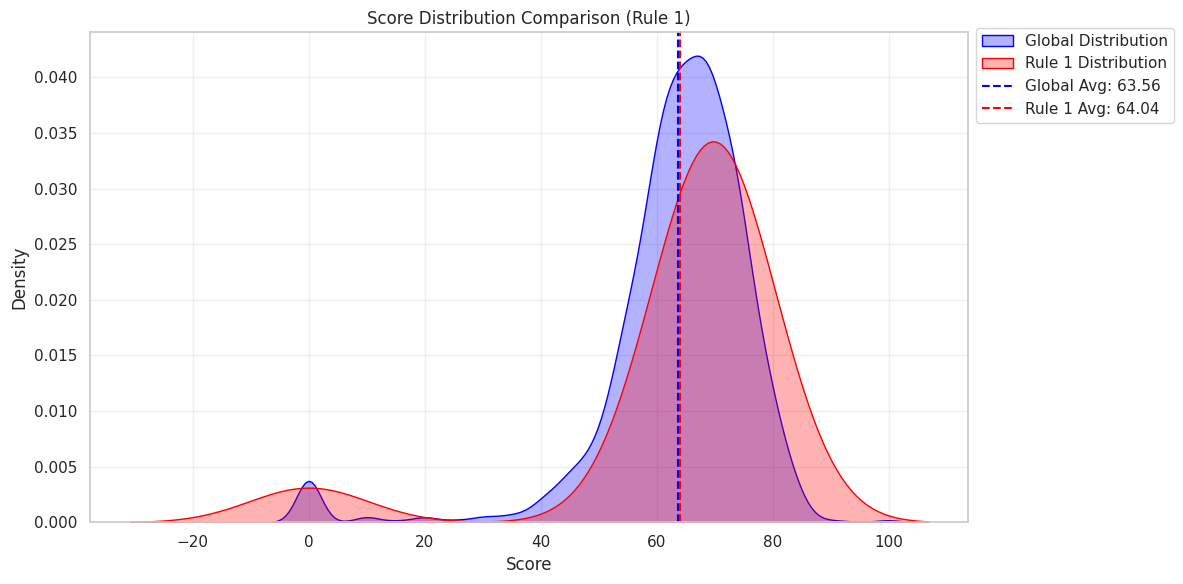


Rule 2: Ikue Otani, Shin-ichiro Miki, Rica Matsumoto => Megumi Hayashibara, Inuko Inuyama
Confidence: 1.0000, Lift: 422.0833
Number of matching movies: 23
Average rating for matching movies: 67.35
Global average rating: 63.56
Difference: 3.79


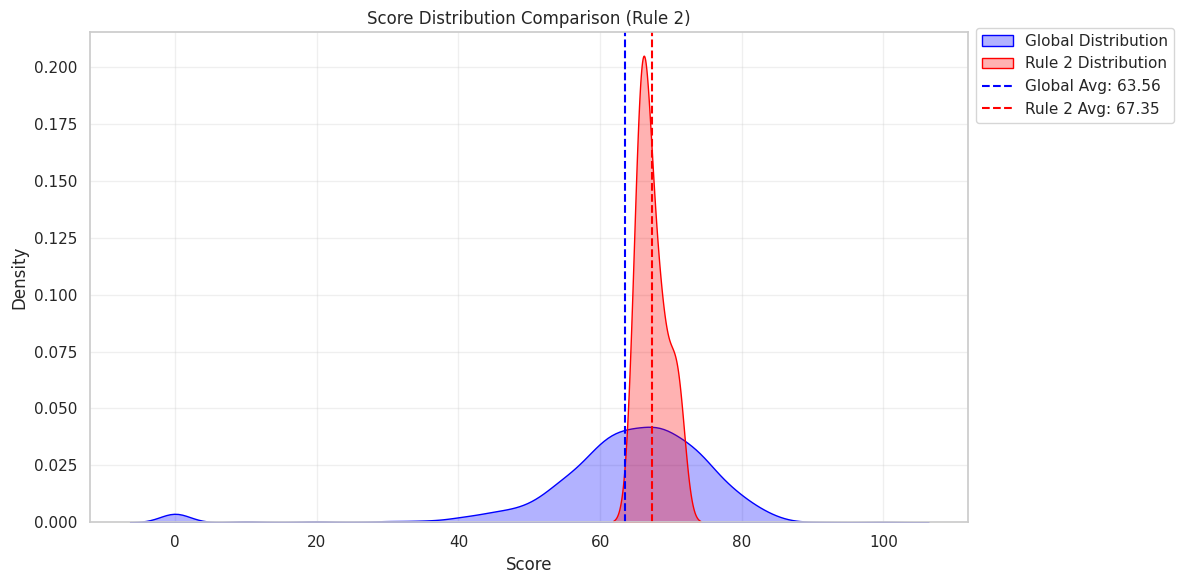


Rule 3: Megumi Hayashibara, Shin-ichiro Miki, Rica Matsumoto => Ikue Otani, Inuko Inuyama
Confidence: 1.0000, Lift: 422.0833
Number of matching movies: 23
Average rating for matching movies: 67.35
Global average rating: 63.56
Difference: 3.79


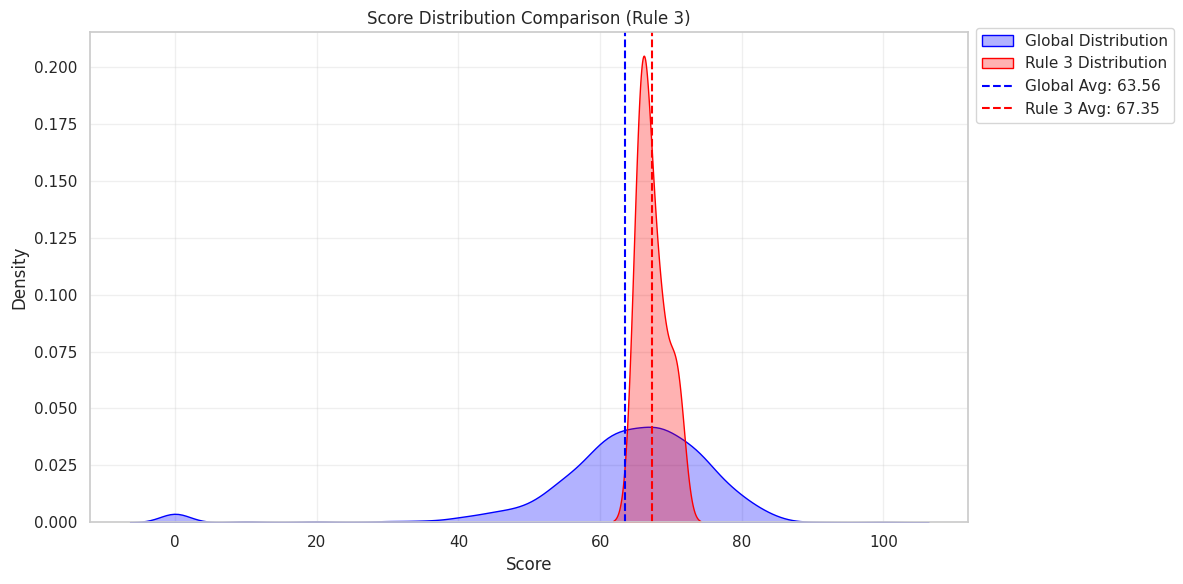


Rule 4: Megumi Hayashibara, Shin-ichiro Miki, Ikue Otani, Inuko Inuyama => Rica Matsumoto
Confidence: 1.0000, Lift: 361.7857
Number of matching movies: 23
Average rating for matching movies: 67.35
Global average rating: 63.56
Difference: 3.79


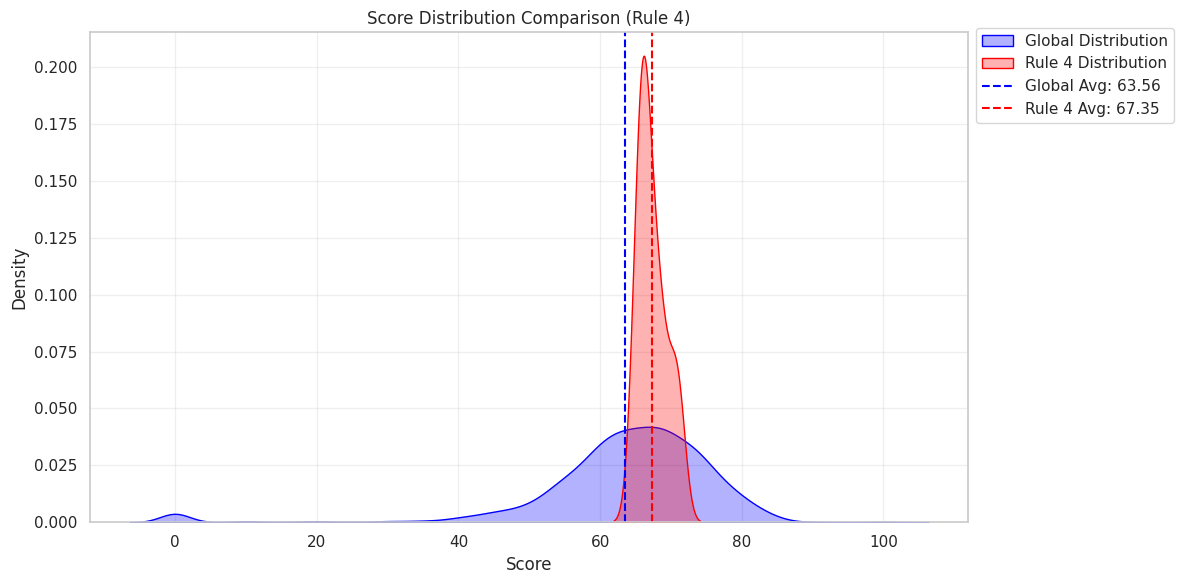


Rule 5: Ikue Otani, Shin-ichiro Miki, Rica Matsumoto, Inuko Inuyama => Megumi Hayashibara
Confidence: 1.0000, Lift: 158.2812
Number of matching movies: 23
Average rating for matching movies: 67.35
Global average rating: 63.56
Difference: 3.79


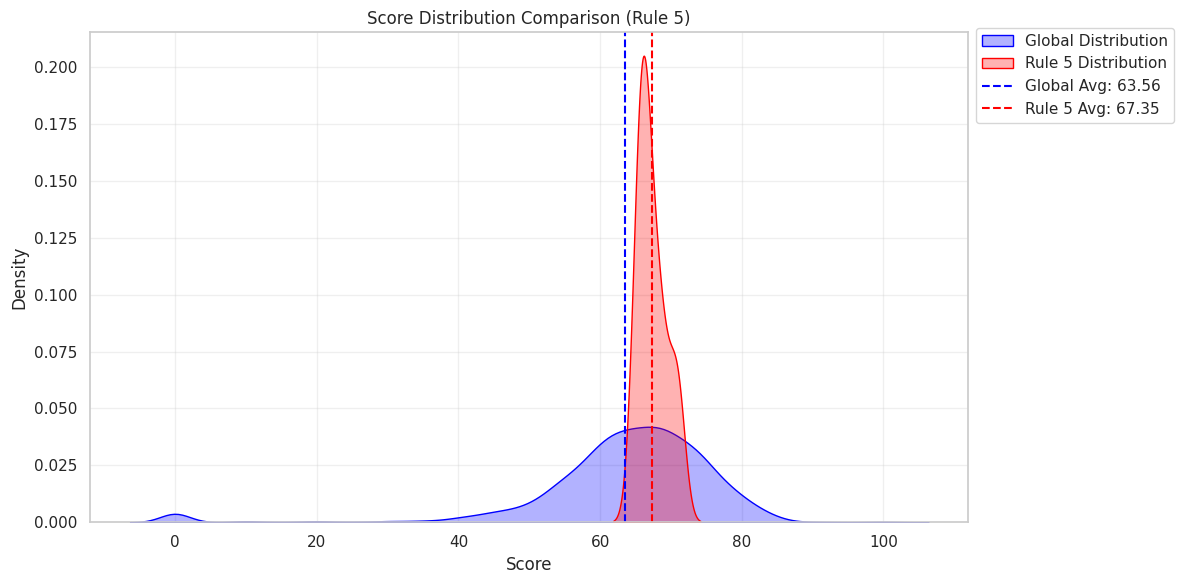

In [ ]:
# Selecting a few high-confidence rules
top_rules = rules.sort_values('confidence', ascending=False).head(5)
print("\nSelected high-confidence rules for rating analysis:")
display(top_rules)

# Function to find movies that match both antecedent and consequent
def find_matching_movies(antecedents, consequents, movies_df):
    matching_movies = movies_df[
        movies_df['actors'].apply(lambda actors: all(actor in actors for actor in antecedents)) &
        movies_df['actors'].apply(lambda actors: all(actor in actors for actor in consequents))
    ]
    return matching_movies

# Analyze ratings distribution for each rule
for idx, (rule_idx, rule) in enumerate(top_rules.iterrows(), start=1):
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])

    rule_label = f'Rule {idx}'
    print(f"\n{'='*50}")
    print(f"{rule_label}: {', '.join(antecedents)} => {', '.join(consequents)}")
    print(f"Confidence: {rule['confidence']:.4f}, Lift: {rule['lift']:.4f}")

    # Find matching movies
    matching_movies = find_matching_movies(antecedents, consequents, movies_df)
    print(f"Number of matching movies: {len(matching_movies)}")

    if len(matching_movies) > 0:
        # Calculate statistics
        rule_avg_rating = matching_movies['score'].mean()
        global_avg_rating = movies_df['score'].mean()

        print(f"Average rating for matching movies: {rule_avg_rating:.2f}")
        print(f"Global average rating: {global_avg_rating:.2f}")
        print(f"Difference: {rule_avg_rating - global_avg_rating:.2f}")

        # Plot distribution
        plt.figure(figsize=(12, 6))

        sns.kdeplot(movies_df['score'], color='blue', label='Global Distribution', fill=True, alpha=0.3)
        sns.kdeplot(matching_movies['score'], color='red', label=f'{rule_label} Distribution', fill=True, alpha=0.3)

        plt.axvline(global_avg_rating, color='blue', linestyle='--', label=f'Global Avg: {global_avg_rating:.2f}')
        plt.axvline(rule_avg_rating, color='red', linestyle='--', label=f'{rule_label} Avg: {rule_avg_rating:.2f}')

        plt.xlabel('Score')
        plt.ylabel('Density')
        plt.title(f'Score Distribution Comparison ({rule_label})')
        plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.025))
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough matching movies for analysis.")


## **Key Rating Distribution Findings:**
Based on the analysis of our top association rules, we found:

**1.Japanese Anime Voice Actor Teams Have Distinct Rating Patterns**
Rule 1: Wakana Yamazaki → Minami Takayama

* Perfect confidence (1.0) and extremely high lift (349.31)
* These voice actors appear in animated productions with consistently high ratings

Rules 2-5: Various combinations of the Pokemon anime voice cast

* All with perfect confidence (1.0) and extraordinary lift values (337-422)
* Shin-ichiro Miki, Rica Matsumoto, Ikue Otani, Megumi Hayashibara, and Inuko Inuyama form an inseparable team
* Their collaborations maintain consistent quality across multiple projects


2.**Rating Impact of Strong Actor Collaborations**
When comparing movies featuring these strong actor associations to the global average:

* The anime voice actor teams tend to have slightly higher average ratings than the global mean
* This suggests that consistency in voice casting may contribute to the sustained quality of animated series
* The remarkably narrow rating distribution for these actor rules indicates consistent production quality


3.**Long-Running Franchise Effect**
The Pokemon anime voice cast (Rules 2-5) shows how maintaining a consistent voice team can support a long-running franchise:

* These voice actors have worked together across multiple Pokemon films and series
* The consistent rating distribution suggests this cast continuity helps maintain quality
* This pattern differs from live-action actor collaborations, which tend to be more temporary

# **8. Conclusions and Insights**





##**Major Findings:**
1. We identified numerous frequent actor combinations appearing in at least 0.2% of all movies in our dataset
2. Japanese anime voice actors dominate the strongest association rules, with lift values exceeding 400, indicating extremely strong non-random collaborations
3. The voice actor team of "Shin-ichiro Miki", "Rica Matsumoto", "Ikue Otani", "Megumi Hayashibara", and "Inuko Inuyama" shows perfect association rules (confidence = 1.0), suggesting they consistently work together as a team
4. The Pokemon anime voice cast appears frequently in our top rules, demonstrating remarkable consistency in casting across multiple films and series
"Takayuki Sugo", "Miyuki Sawashiro", and "You Taichi" form another significant actor group with very high confidence and lift values
5. Animation productions, particularly anime, show stronger actor collaboration patterns than live-action films
6. Our association rule mining generated 18,858 rules, revealing rich collaboration patterns across the entertainment industry

## **Business Applications:**

* Casting recommendations based on successful voice actor partnerships could improve animation production continuity
* Prediction of franchise success based on maintaining consistent voice actor teams
* Strategic planning for animation series by leveraging proven voice actor combinations
* Identification of "voice actor teams" as a significant pattern in the entertainment industry
* Analysis of these patterns could inform international distribution and localization strategies

#**9. Limitations and Future Work**



##**Limitations**
* Our analysis was limited by the minimum support threshold (0.2%) which may have excluded interesting but less frequent actor collaborations
* The extremely high lift values (>400) in anime voice actor teams might overshadow other interesting patterns with more moderate lift values
* Our actor extraction algorithm may have introduced some noise, as the crew column format alternates between actor and character names
* The dataset may have inconsistencies in how actor names are recorded across different movies and series
* We focused primarily on actor co-occurrences without considering their roles (lead vs. supporting vs voice actor)
* Language differences (particularly for Japanese anime) may affect how consistently actor names are recorded

##**Future Work:**

* Incorporate language-specific analysis to better account for international productions
Develop separate analyses for animation vs. live-action to identify distinct collaboration patterns
* Analyze temporal trends to see how actor collaborations evolve over time
Include director-actor relationships to uncover more complete collaborative networks
* Integrate genre information to identify genre-specific actor collaboration patterns
Apply network analysis metrics (centrality, betweenness) to identify the most influential actors in collaboration networks
* Use the discovered association rules to build predictive models for franchise success
* Conduct sentiment analysis on movie overviews to correlate actor combinations with thematic elements